**[Opsim Databases](http://astro-lsst-01.astro.washington.edu:8080/)**

- [baseline2018](#baseline2018.db)
- [colossus_2667](#colossus_2667.db)
- [pontus_2573](#pontus_2573.db)
- [pontus_2579](#pontus_2579.db)
- [pontus_2489](#pontus_2489.db)
- [nexus_2097](#nexus_2097.db)

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import healpy as hp
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.metricBundles as metricBundles
import lsst.sims.maf.db as db
import lsst.sims.maf.utils as utils
import lsst.sims.maf.plots as plots

# open database use OpsimDatabase
# opsdb = db.OpsimDatabase('baseline2018a.db')

# output
outDir = 'outdir'
resultsDb = db.ResultsDb(outDir=outDir)



import [TDEsMetricTest](https://github.com/xiaolng/maf/blob/master/TDEsMetricTest.py)


In [2]:
from mycode.TDEsMetricTest import TDEsMetricTest
plt.rcParams['figure.figsize'] = (10.0, 6.0) # set default size of plots


**Minimum requirement for detection TDEs**

- one detection before peak in any band,  set nObsPrePeak=1;
- detections in three different bands within 5 days of peak, set nFiltersNearPeak=3, and nearPeakT=5;
- detections at least two bands post peak within two weeks, set nFiltersPostPeak=2, and postPeakT=14.


In [3]:
# light curve file
asciifile = 'TDEfaintfast_z0.1.dat'

# query columns 
mjdCol = 'observationStartMJD'
m5Col = 'fiveSigmaDepth'
filterCol = 'filter'
detectSNR={'u': 5, 'g': 5, 'r': 5, 'i': 5, 'z': 5, 'y': 5}

# light curve parameters
epochStart = -22
peakEpoch = 0
nearPeakT = 10
postPeakT = 14 # two weeks
nPhaseCheck = 1

# condition parameters
nObsTotal = {'u': 0, 'g': 0, 'r': 0, 'i': 0, 'z': 0, 'y': 0}
nObsPrePeak = 1
nObsNearPeak = {'u': 0, 'g': 0, 'r': 0, 'i': 0, 'z': 0, 'y': 0}
nFiltersNearPeak = 3
nObsPostPeak = 0 
nFiltersPostPeak = 2


In [203]:
# plot light curve
def plotlc(dataSlice, time_key='time', mag_key='mag', filter_key='filter', err_key = None,
          peakEpoch=None, nearPeakT=None, postPeakT=None):
    # Input: dataSlice, pandas DataFrame or numpy ndarray
    
    colors = {'u':'k', 'g':'b', 'r':'r', 'i':'m', 'z':'orange', 'y':'c'}
    
    plt.figure(figsize=(10, 6))
    for f in np.unique(dataSlice[filter_key]):
        fmatch = dataSlice[filter_key]==f
        time = dataSlice[time_key][fmatch]
        mag = dataSlice[mag_key][fmatch]
        
        # seperate pre/near/post peak
        if peakEpoch!=None:
            plt.axvline(x=peakEpoch, linestyle='-', linewidth=1)
            plt.axvline(x=peakEpoch-nearPeakT/2, linestyle='--', linewidth=1)
            plt.axvline(x=peakEpoch+nearPeakT/2, linestyle='--', linewidth=1)
            plt.axvline(x=peakEpoch+nearPeakT/2+postPeakT, linestyle='--', linewidth=1)
        
        if err_key!=None:
            mag_err = dataSlice[err_key][fmatch]
            plt.errorbar(time, mag, yerr=mag_err, color=colors[f], fmt='.', label=f)
        else:
            plt.scatter(time, mag, color=colors[f], marker='*', label=f)

    plt.legend()
    plt.xlabel('days')
    plt.ylabel('mag')
    plt.ylim(plt.ylim()[::-1])
    

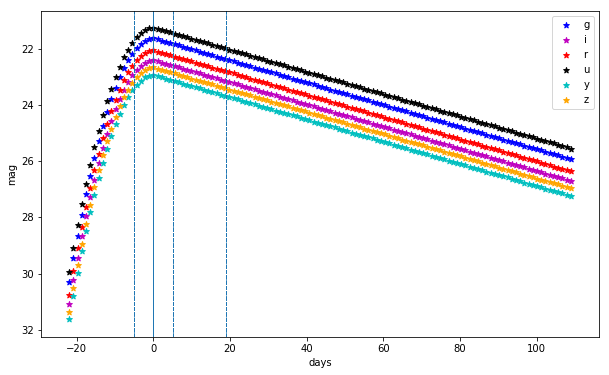

In [204]:
asciifile = 'TDEfaintfast_z0.1.dat'

lcv_template = np.genfromtxt(asciifile, dtype=[('ph', 'f8'), ('mag', 'f8'), ('flt', 'S1')])

df = pd.DataFrame()
df['ph'] = lcv_template['ph']
df['mag'] = lcv_template['mag']
df['flt'] = lcv_template['flt'].astype(str)

plotlc(df, time_key='ph', mag_key='mag', filter_key='flt', peakEpoch=peakEpoch, nearPeakT=nearPeakT, postPeakT=postPeakT)



## baseline2018.db

In [6]:
opsdb_baseline = db.OpsimDatabase('baseline2018a.db')

Finish initializing metric
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint night<700 for columns ['fieldRA', 'fiveSigmaDepth', 'observationStartMJD', 'fieldDec', 'filter']
Found 431650 visits
Running:  ['transmetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "night<700" constraint now.


/home/docmaf/stack/stack/miniconda3-4.3.21-10a4fa6/Linux64/sims_maf/2.8.0.sims/python/lsst/sims/maf/utils/mafUtils.py:58: RuntimeWarning: divide by zero encountered in double_scalars
  nbins = (binmax - binmin) / binwidth
/home/docmaf/stack/stack/miniconda3-4.3.21-10a4fa6/Linux64/sims_maf/2.8.0.sims/python/lsst/sims/maf/utils/mafUtils.py:60: UserWarning: Optimal bin calculation tried to make inf bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))


monopole: 0.0198108  dipole: lon: 155.639, lat: -46.8678, amp: 0.0411364
Plotting complete.


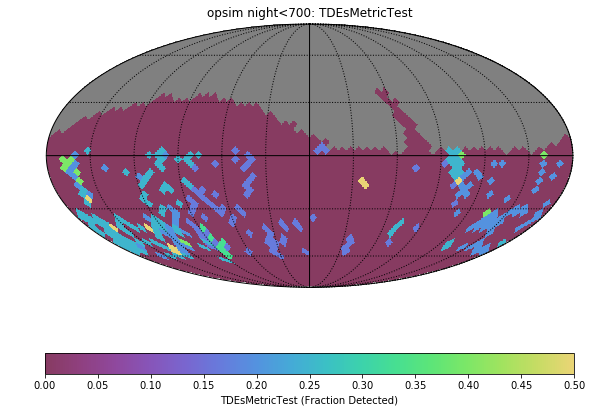

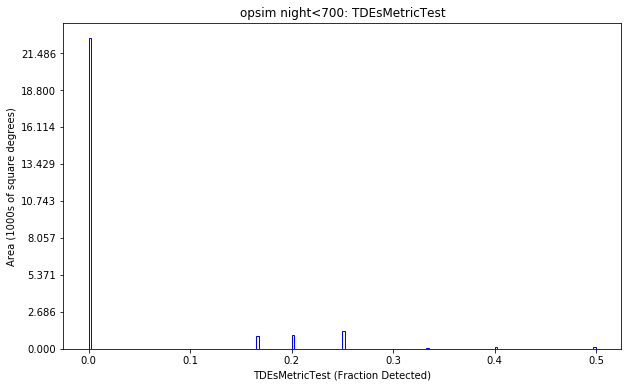

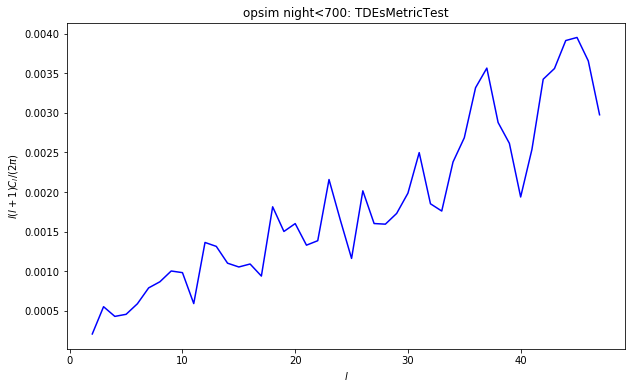

In [7]:
## get skymap
transmetric = TDEsMetricTest(asciifile=asciifile, mjdCol=mjdCol, m5Col=m5Col, filterCol=filterCol, 
                 detectSNR=detectSNR,
                 epochStart=epochStart, peakEpoch=peakEpoch, nearPeakT=nearPeakT, postPeakT=postPeakT, nPhaseCheck=nPhaseCheck,
                 nObsTotal= nObsTotal,nObsPrePeak=nObsPrePeak, 
                 nObsNearPeak=nObsNearPeak, nFiltersNearPeak=nFiltersNearPeak, 
                 nObsPostPeak=nObsPostPeak, nFiltersPostPeak=nFiltersPostPeak,
                 dataout=False)

slicer = slicers.HealpixSlicer(nside=16) 
sqlconstraint = 'night<700'

transmetricSky = metricBundles.MetricBundle(transmetric,slicer,sqlconstraint)

group = metricBundles.MetricBundleGroup({'transmetricSky':transmetricSky}, opsdb_baseline, outDir=outDir, resultsDb=resultsDb)
group.runAll()
group.plotAll(closefigs=False)

In [10]:
transmetricSky.metricValues

masked_array(data = [-- -- -- ..., 0.0 0.0 0.0],
             mask = [ True  True  True ..., False False False],
       fill_value = -1.6375e+30)

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


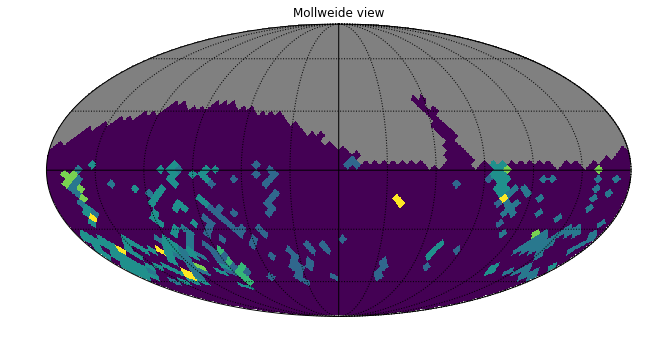

In [115]:
hp.mollview(transmetricSky.metricValues, cbar=False)
hp.graticule()


In [78]:
data = transmetricSky.metricValues

In [79]:
np.unique(data)

masked_array(data = [0.0 0.16666666666666666 0.2 0.25 0.3333333333333333 0.4 0.5 --],
             mask = [False False False False False False False  True],
       fill_value = -1.6375e+30)

In [87]:
np.where(data==0.5)   # get the ipix 

(array([1933, 1945, 2009, 2172, 2551, 2556, 2777, 2824]),)

In [144]:
hp.pix2ang(ipix=1933, nside=16, lonlat=True)

(255.9375, -14.477512185929939)

In [145]:
def plot_mwd(RA,Dec,c,org=0,title='Mollweide projection', projection='mollweide'):
    ''' RA, Dec are arrays of the same length.
    RA takes values in [0,360), Dec in [-90,90],
    which represent angles in degrees.
    org is the origin of the plot, 0 or a multiple of 30 degrees in [0,360).
    title is the title of the figure.
    projection is the kind of projection: 'mollweide', 'aitoff', 'hammer', 'lambert'
    '''
    x = np.remainder(RA+360-org,360) # shift RA values
    ind = x>180
    x[ind] -=360    # scale conversion to [-180, 180]
    x=-x    # reverse the scale: East to the left
    tick_labels = np.array([150, 120, 90, 60, 30, 0, 330, 300, 270, 240, 210])
    tick_labels = np.remainder(tick_labels+360+org,360)
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(111, projection=projection, axisbg ='LightCyan')
    ax.scatter(np.radians(x),np.radians(Dec), c=c, marker='D')  # convert degrees to radians
    ax.set_xticklabels(tick_labels)     # we add the scale on the x axis
    ax.set_title(title)
    ax.title.set_fontsize(15)
    ax.set_xlabel("RA")
    ax.xaxis.label.set_fontsize(12)
    ax.set_ylabel("Dec")
    ax.yaxis.label.set_fontsize(12)
    ax.grid(True)


/home/docmaf/stack/python/miniconda3-4.3.21/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/home/docmaf/stack/python/miniconda3-4.3.21/lib/python3.6/site-packages/matplotlib/projections/geo.py:493: RuntimeWarning: invalid value encountered in arcsin
  theta = np.arcsin(y / np.sqrt(2))


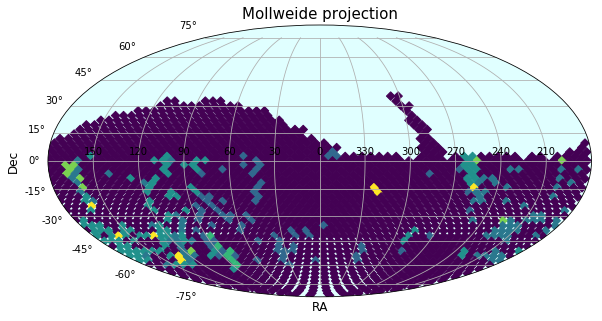

In [149]:
plot_mwd(df['ra'], df['dec'], df[0])

In [137]:
df = pd.DataFrame(data)
df['ipix'] = df.index 
df['ra'] = hp.pix2ang(ipix=df['ipix'], nside=16, lonlat=True)[0]
df['dec'] = hp.pix2ang(ipix=df['ipix'], nside=16, lonlat=True)[1]
df.head()

,0,ipix,ra,dec
0,NaN,0,45.0,87.075820
1,NaN,1,135.0,87.075820
2,NaN,2,225.0,87.075820
3,NaN,3,315.0,87.075820
4,NaN,4,22.5,84.149733


In [76]:
df0 = dfnona[dfnona[0]==0.25]
df0.index

Int64Index([1458, 1467, 1486, 1487, 1517, 1518, 1522, 1523, 1550, 1583, 1584,
            1586, 1614, 1615, 1646, 1650, 1677, 1678, 1714, 1742, 1779, 1782,
            1805, 1806, 1844, 1870, 1903, 1908, 1967, 1970, 1973, 2033, 2034,
            2044, 2101, 2109, 2165, 2225, 2229, 2237, 2291, 2356, 2367, 2421,
            2426, 2429, 2430, 2431, 2485, 2486, 2490, 2491, 2493, 2494, 2495,
            2515, 2547, 2549, 2550, 2552, 2553, 2555, 2557, 2559, 2579, 2610,
            2613, 2617, 2619, 2620, 2621, 2640, 2672, 2677, 2678, 2721, 2728,
            2729, 2730, 2731, 2732, 2733, 2734, 2741, 2773, 2778, 2782, 2783,
            2790, 2828, 2829, 2866, 2867, 2868, 2901],
           dtype='int64')

In [70]:
np.unique(dfnona[0], return_index=True, return_counts=True)

(array([ 0.        ,  0.16666667,  0.2       ,  0.25      ,  0.33333333,
         0.4       ,  0.5       ]),
 array([   0,  317,  395,  337, 1417,  413,  807]),
 array([1680,   70,   77,   95,    6,   10,    8]))

In [72]:
df = pd.DataFrame(data)
pd.set_option('display.max_rows', 4000)
dfnona = df.dropna()
dfnona

,0
661,0.000000
662,0.000000
685,0.000000
686,0.000000
687,0.000000
691,0.000000
692,0.000000
726,0.000000
746,0.000000
747,0.000000


In [ ]:
# get (ra, dec) use healpy 




In [150]:
## get light curve
transmetric = TDEsMetricTest(asciifile=asciifile, mjdCol=mjdCol, m5Col=m5Col, filterCol=filterCol, 
                 detectSNR=detectSNR,
                 epochStart=epochStart, peakEpoch=peakEpoch, nearPeakT=nearPeakT, nPhaseCheck=nPhaseCheck,
                 nObsTotal= nObsTotal,nObsPrePeak=nObsPrePeak, 
                 nObsNearPeak=nObsNearPeak, nFiltersNearPeak=nFiltersNearPeak, 
                 nObsPostPeak=nObsPostPeak, nFiltersPostPeak=nFiltersPostPeak,
                 dataout=True)
# ipix 1933
ra = np.array([255.9375])
dec = np.array([-14.4775])
slicer = slicers.UserPointsSlicer(ra, dec)

sqlconstraint = 'night<700'
transmetricSky = metricBundles.MetricBundle(transmetric,slicer,sqlconstraint)

group = metricBundles.MetricBundleGroup({'transmetricSky':transmetricSky}, opsdb_baseline, outDir=outDir, resultsDb=resultsDb)
group.runAll()
group.plotAll(closefigs=False)

Finish initializing metric
Querying database SummaryAllProps with constraint night<700 for columns ['fieldRA', 'fiveSigmaDepth', 'observationStartMJD', 'fieldDec', 'filter']
Found 431650 visits
Running:  ['transmetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "night<700" constraint now.
Plotting complete.


/home/docmaf/stack/stack/miniconda3-4.3.21-10a4fa6/Linux64/sims_maf/2.8.0.sims/python/lsst/sims/maf/plots/plotHandler.py:517: UserWarning: Cannot plot object metric values with this plotter.
  warnings.warn('Cannot plot object metric values with this plotter.')


In [196]:
np.unique(df['lcNumber'])

array([ 0.,  1.,  2.,  3.])

In [202]:
df[ (df['lcAboveThresh']) & (df['lcNumber']==0)]

,detected,expMJD,filters,lcAboveThresh,lcEpoch,lcMags,lcMagsStd,lcNumber,lcSNR,m5,nearPeakCheck,postPeakCheck,prePeakCheck,tshift
7,True,60047.312708,i,True,-3.081667,22.578167,0.066577,0.0,15.813072,23.828282,False,False,True,0.0
8,True,60047.334062,i,True,-3.060313,22.576031,0.069138,0.0,15.209222,23.783874,False,False,True,0.0
9,True,60048.367222,g,True,-2.027153,21.700572,0.016954,0.0,63.541076,24.460783,True,False,False,0.0
10,True,60048.384595,g,True,-2.009780,21.699624,0.017790,0.0,60.533353,24.407186,True,False,False,0.0
11,True,60049.357755,i,True,-1.036620,22.418848,0.071958,0.0,14.593978,23.581857,True,False,False,0.0
12,True,60049.383137,i,True,-1.011238,22.418386,0.075685,0.0,13.851195,23.524679,True,False,False,0.0
13,True,60051.331840,u,True,0.937465,21.284090,0.020567,0.0,52.292993,23.832773,True,False,False,0.0
14,True,60052.318113,u,True,1.923738,21.319954,0.021909,0.0,49.058472,23.799314,True,False,False,0.0
15,True,60053.315486,u,True,2.921111,21.362778,0.025215,0.0,42.561465,23.687894,False,True,False,0.0
17,True,60057.347396,r,True,6.953021,22.332837,0.030147,0.0,35.516560,24.461489,False,True,False,0.0


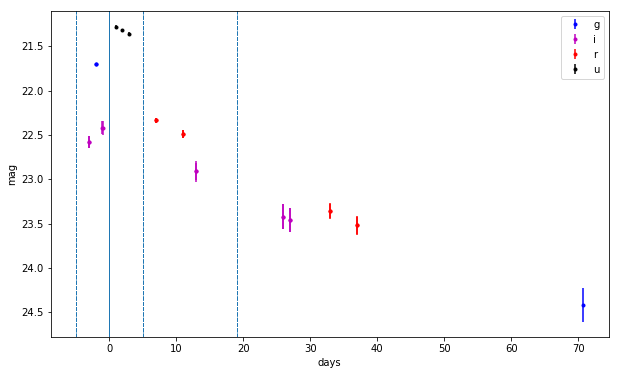

In [205]:
# save file and plot light curve

output_dict_list = transmetricSky.metricValues.data[0]
df = pd.DataFrame(output_dict_list[0])

plotlc(df[ (df['lcAboveThresh']) & (df['lcNumber']==0)], time_key='lcEpoch', mag_key='lcMags', filter_key='filters', err_key='lcMagsStd', peakEpoch=peakEpoch, nearPeakT=nearPeakT, postPeakT=postPeakT)



In [161]:
df[df['lcAboveThresh']]

,detected,expMJD,filters,lcAboveThresh,lcEpoch,lcMags,lcMagsStd,lcNumber,lcSNR,m5,nearPeakCheck,postPeakCheck,prePeakCheck,tshift
7,True,60047.312708,i,True,-3.081667,22.578167,0.066577,0.0,15.813072,23.828282,False,False,True,0.0
8,True,60047.334062,i,True,-3.060313,22.576031,0.069138,0.0,15.209222,23.783874,False,False,True,0.0
9,True,60048.367222,g,True,-2.027153,21.700572,0.016954,0.0,63.541076,24.460783,True,False,False,0.0
10,True,60048.384595,g,True,-2.009780,21.699624,0.017790,0.0,60.533353,24.407186,True,False,False,0.0
11,True,60049.357755,i,True,-1.036620,22.418848,0.071958,0.0,14.593978,23.581857,True,False,False,0.0
12,True,60049.383137,i,True,-1.011238,22.418386,0.075685,0.0,13.851195,23.524679,True,False,False,0.0
13,True,60051.331840,u,True,0.937465,21.284090,0.020567,0.0,52.292993,23.832773,True,False,False,0.0
14,True,60052.318113,u,True,1.923738,21.319954,0.021909,0.0,49.058472,23.799314,True,False,False,0.0
15,True,60053.315486,u,True,2.921111,21.362778,0.025215,0.0,42.561465,23.687894,False,True,False,0.0
17,True,60057.347396,r,True,6.953021,22.332837,0.030147,0.0,35.516560,24.461489,False,True,False,0.0


In [166]:
help(plt.axvline)

Help on function axvline in module matplotlib.pyplot:

axvline(x=0, ymin=0, ymax=1, hold=None, **kwargs)
    Add a vertical line across the axes.
    
    Parameters
    ----------
    x : scalar, optional, default: 0
        x position in data coordinates of the vertical line.
    
    ymin : scalar, optional, default: 0
        Should be between 0 and 1, 0 being the bottom of the plot, 1 the
        top of the plot.
    
    ymax : scalar, optional, default: 1
        Should be between 0 and 1, 0 being the bottom of the plot, 1 the
        top of the plot.
    
    Returns
    -------
    :class:`~matplotlib.lines.Line2D`
    
    
    Examples
    --------
    * draw a thick red vline at *x* = 0 that spans the yrange::
    
        >>> axvline(linewidth=4, color='r')
    
    * draw a default vline at *x* = 1 that spans the yrange::
    
        >>> axvline(x=1)
    
    * draw a default vline at *x* = .5 that spans the middle half of
      the yrange::
    
        >>> axvline(x=.5